# AccelerateAI - Multiple Linear Regression 

In this notebook, we will look at some simple and no-so-simple use cases where Regression modeling is applied.

This will cover:
 - Model Specification 
 - Multicollinearity Check
 - Parameter Estimation
 - Model Interpretation 
 - Model Diagnostics
 - Estimation of Adjusted R-Squared

### 1. Body Fat estimation 

We will use the Body fat dataset (252 observation) to estimates of the percentage of body fat using various body circumference measurements for 252 men.

In [16]:
import numpy as np
import pandas as pd 

import seaborn as sbn 
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [17]:
# Load the dataset
bodyfat_df = pd.read_csv("04_Bodyfat.csv")
bodyfat_df.sample(5)

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
70,1.0439,24.3,62,167.50,71.50,35.5,97.6,91.5,98.5,56.6,38.6,22.4,31.5,27.3,18.6
198,1.0841,6.6,42,167.25,72.75,37.6,94.0,78.0,99.0,57.5,40.0,22.5,30.6,30.0,18.5
138,1.0481,22.4,40,168.25,71.25,34.3,98.3,88.5,98.3,58.1,38.4,22.5,31.7,27.4,17.6
24,1.0668,14.0,28,151.25,67.75,34.5,90.2,76.3,95.8,58.4,35.5,22.9,31.1,28.0,17.6


In [18]:
# Drop Density 
bodyfat_df.drop(columns="Density", inplace=True)
print(bodyfat_df.columns)

Index(['bodyfat', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip',
       'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist'],
      dtype='object')


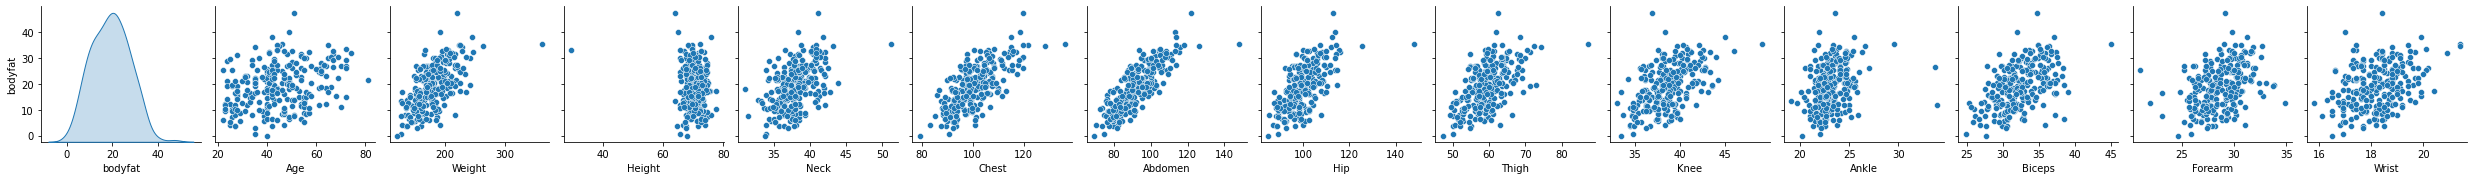

In [19]:
sbn.pairplot(data = bodyfat_df, 
             y_vars= 'bodyfat',
             diag_kind='kde')                     # KDE on diagnols instead of histogram

In [20]:
# Correlation of bodyfat with other variables 
bodyfat_df.corr().loc["bodyfat"]

bodyfat    1.000000
Age        0.291458
Weight     0.612414
Height    -0.089495
Neck       0.490592
Chest      0.702620
Abdomen    0.813432
Hip        0.625201
Thigh      0.559608
Knee       0.508665
Ankle      0.265970
Biceps     0.493271
Forearm    0.361387
Wrist      0.346575
Name: bodyfat, dtype: float64

In [21]:
# Training a linear regression model for bodyfat ~ X  

Y = bodyfat_df.bodyfat

X = bodyfat_df.drop(columns='bodyfat')
X = sm.add_constant(X) # adding a constant

reg_model = sm.OLS(Y,X).fit()
print(reg_model.summary())                 #Notice the unstable coefficients - these don't make sense 

                            OLS Regression Results                            
Dep. Variable:                bodyfat   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.65
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           7.72e-64
Time:                        14:54:19   Log-Likelihood:                -718.25
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     238   BIC:                             1514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.1885     17.349     -1.048      0.2

D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [22]:
# Choosing the relevent variables 
reg_model.pvalues[reg_model.pvalues < 0.05]

Neck       4.404908e-02
Abdomen    3.633464e-23
Forearm    2.410195e-02
Wrist      2.719505e-03
dtype: float64

In [23]:
# Check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
               index=X.columns)

const      4091.885819
Age           2.250450
Weight       33.509320
Height        1.674591
Neck          4.324463
Chest         9.460877
Abdomen      11.767073
Hip          14.796520
Thigh         7.777865
Knee          4.612147
Ankle         1.907961
Biceps        3.619744
Forearm       2.192492
Wrist         3.377515
dtype: float64

In [24]:
# Keeping only significant and non-collinear variables 

X = bodyfat_df[['Neck', 'Abdomen', 'Wrist' ]]  #,'Forearm']]
X = sm.add_constant(X) # adding a constant

reg_model = sm.OLS(Y,X).fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                bodyfat   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     203.1
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           1.66e-66
Time:                        14:54:19   Log-Likelihood:                -736.14
No. Observations:                 252   AIC:                             1480.
Df Residuals:                     248   BIC:                             1494.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.9514      5.907     -0.838      0.4

D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [25]:
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
               index=X.columns)

#X.corr()

const      428.897938
Neck         3.263857
Abdomen      2.359793
Wrist        2.286300
dtype: float64

In [26]:
X = bodyfat_df[['Abdomen']]  #,'Forearm']]
X = sm.add_constant(X) # adding a constant
reg_model_final = sm.OLS(Y,X).fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                bodyfat   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     203.1
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           1.66e-66
Time:                        14:54:19   Log-Likelihood:                -736.14
No. Observations:                 252   AIC:                             1480.
Df Residuals:                     248   BIC:                             1494.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.9514      5.907     -0.838      0.4

D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [27]:
X = bodyfat_df[['Abdomen']]
reg_model_nointercept = sm.OLS(Y,X).fit()
print(reg_model_nointercept.summary())

                                 OLS Regression Results                                
Dep. Variable:                bodyfat   R-squared (uncentered):                   0.899
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              2229.
Date:                Sun, 21 Aug 2022   Prob (F-statistic):                   7.65e-127
Time:                        14:54:19   Log-Likelihood:                         -834.90
No. Observations:                 252   AIC:                                      1672.
Df Residuals:                     251   BIC:                                      1675.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

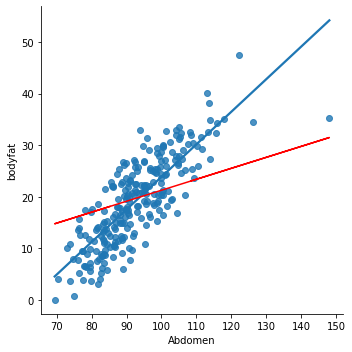

In [28]:
sbn.lmplot(data=bodyfat_df, x='Abdomen', y='bodyfat', ci=None)
plt.plot(bodyfat_df.Abdomen, 0.2126*bodyfat_df.Abdomen, color='red')
plt.show()

#### Question: When is it appropriate to leave out the intercept from the model?

### 2. Predicting Sales with Ad Spend

In [29]:
df = pd.read_csv(r"05_Sales_AdSpend.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


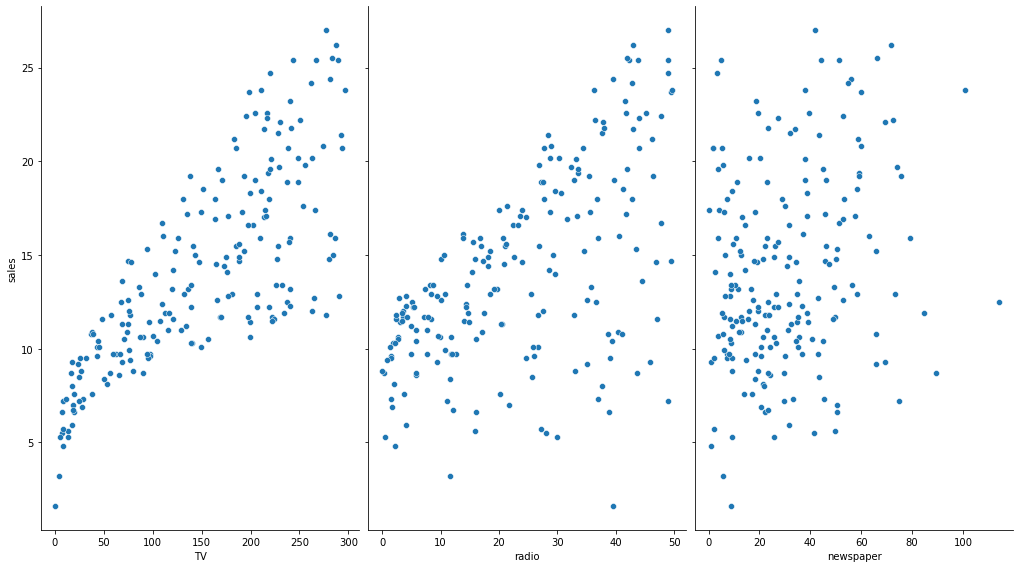

In [30]:
sbn.pairplot(data=df, 
             x_vars=['TV', 'radio', 'newspaper'], 
             y_vars="sales",
             height=8, aspect=0.6)

In [31]:
X = df.drop('sales',axis=1)

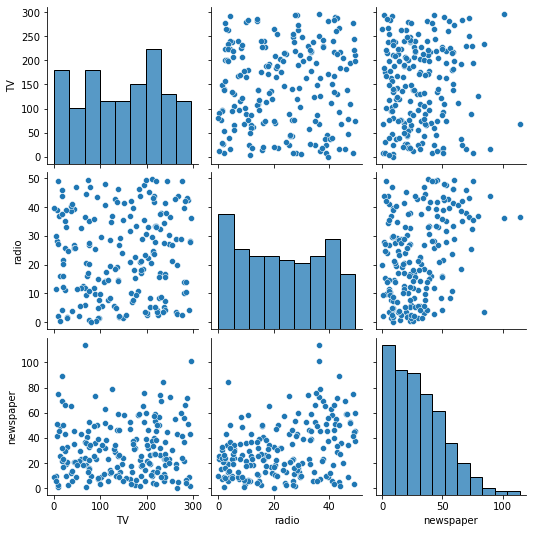

In [32]:
# Check for correlation

sbn.pairplot(X)

In [33]:
X.corr()

,TV,radio,newspaper
TV,1.000000,0.054809,0.056648
radio,0.054809,1.000000,0.354104
newspaper,0.056648,0.354104,1.000000


Correlation doen't seem to be an issue, but let's also check multi-collinearity.

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Check for multi-collinearoty
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
               index=X.columns)

TV           2.486772
radio        3.285462
newspaper    3.055245
dtype: float64

In [35]:
X = sm.add_constant(X) # adding a constant
Y = df['sales']

# Fit an OLS regression model 
sales_model = sm.OLS(Y,X).fit()
print(sales_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           1.58e-96
Time:                        14:54:36   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


D:\anaconda\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


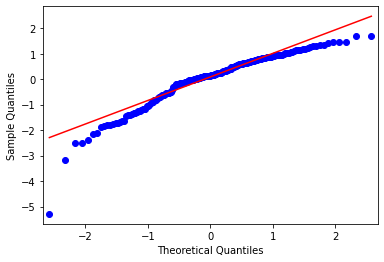

In [36]:
# Q-Q Plot
residuals = sales_model.resid 
sm.qqplot(residuals, fit=True, line="q")
plt.show()

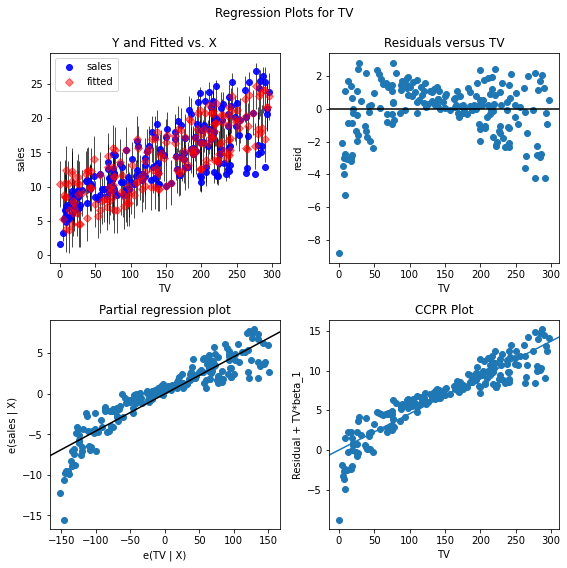

In [37]:
# Define figure size
figure1 = plt.figure(figsize=(8,8))

# Produce regression plots for logreg_model
fig=sm.graphics.plot_regress_exog(sales_model, 'TV', fig=figure1)

"newspaper" doesn't seem to be a significant variable based on its p-value of t-test (0.8600). Let's drop it and fit the model again.  

In [38]:
# Drop "newspaper' Fit an OLS regression model 
X.drop('newspaper',axis=1, inplace=True)

sales_model2 = sm.OLS(Y,X).fit()
print(sales_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           4.83e-98
Time:                        14:54:37   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.0

#### Do we get a better model? 

In [39]:
#fig = sm.graphics.influence_plot(sales_model)